# Clipping with Laguerre Gauss Modes

Example code to compute clipping coefficients for Laguerre-Gauss modes.

(2022) Gabriele Vajente, LIGO Laboratory, Caltech
vajente@caltech.edu

Companion code to the article 
    Vajente, "Analytical expressions for the clipping of
    Laguerre- and Hermite-Gauss modes by circular apertures"
    XXXX, YY (2022)

In [1]:
import numpy
from pylab import *
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

## Radial integral

Compute the clipping coefficients using numerical integration

In [2]:
# set the beam parameters
w0 = 0.1       # beam waist size [m]
z  = 0         # distance from beam waist [m]
rb = 0.30      # radius of the clipping aperture [m]
lb = 1.064e-6  # laser wavelength [m]

# compute some beam parameters
zr = numpy.pi*w0**2/lb              # Rayleight range
k = 2*numpy.pi/lb                   # wavenumber
w = w0 * numpy.sqrt(1 + (z/zr)**2)  # beam size at position
phig = numpy.arctan(z/zr)           # Gouy phase at position

# compute the radial integral to get the coupling coefficients
r = numpy.linspace(0, numpy.sqrt(rb), 2001**2)**2

# the radial integration function is defined here. This function computes the coupling
# coefficients for the LG_00 mode only, not the entire matrix
from clipping.laguerregauss import radial_coupling
%time cr, mr = radial_coupling(0, 0, rb, w0, z, 150, r, lb)

 11476 / 11476
CPU times: user 43 s, sys: 2.35 s, total: 45.3 s
Wall time: 45 s


In [6]:
# only a few coefficients are not zero, select them and create labels for plot
idx = numpy.where(cr != 0)[0]
labels = ['%d %d' % (mr[i][1], mr[i][0]) for i in idx]

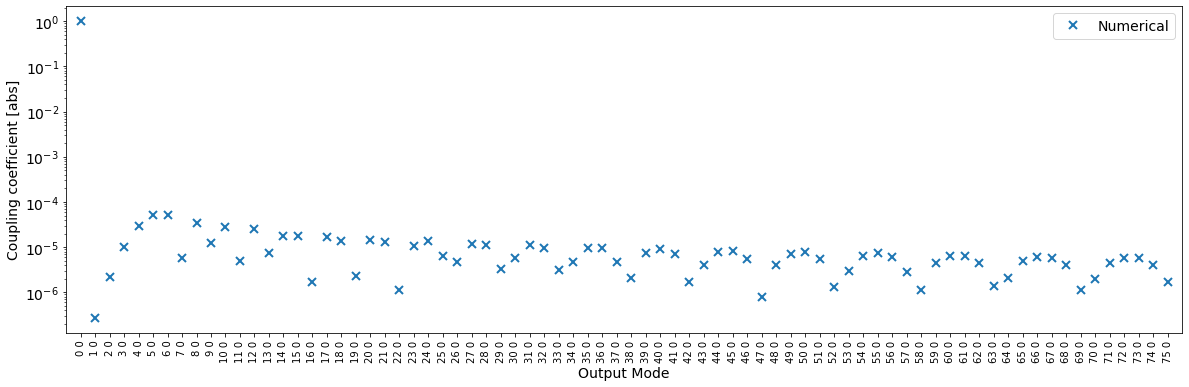

In [7]:
figure(figsize=(20,6))
semilogy(abs(cr[idx]), 'x', markersize=8, markeredgewidth=2, label='Numerical')
xticks(arange(idx.shape[0]), labels, rotation=90, fontsize=10);
xlabel('Output Mode')
ylabel('Coupling coefficient [abs]')
xlim(-1, 76)
legend()

## Analytical expression

In [5]:
# The function to compute the full clipping matrix is defined here
from clipping.analytical import clipping_matrix
%time C, modes = clipping_matrix(rb, w, phig, 150)

11476 / 11476 ELAPSED =  168 s, ETA =    0 sCPU times: user 2min 49s, sys: 424 ms, total: 2min 49s
Wall time: 2min 48s


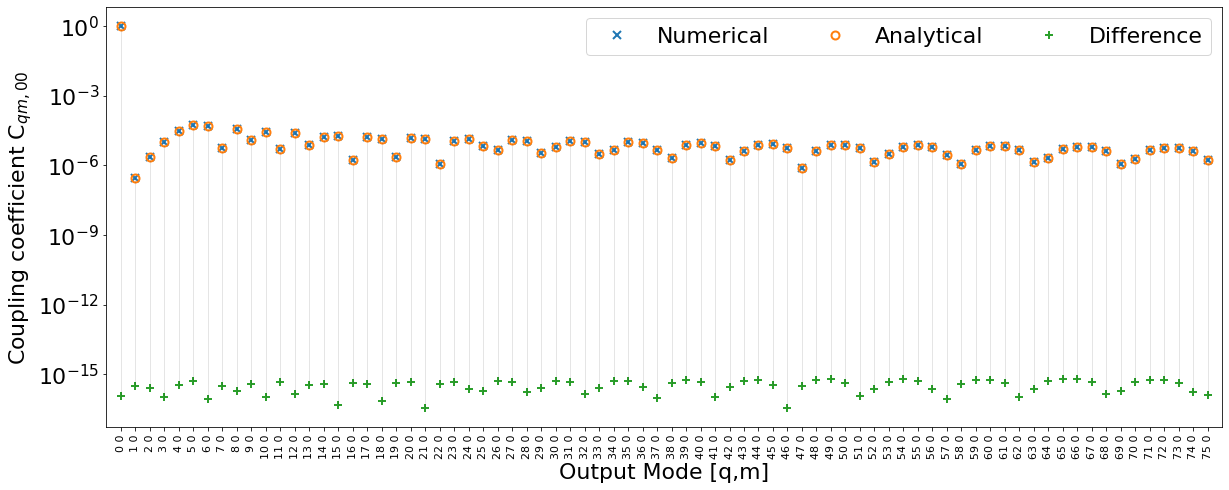

In [11]:
# compare the analytical and numerical results

figure(figsize=(20,8))
semilogy(abs(cr[idx]), 'x', markersize=8, markeredgewidth=2, label='Numerical')
semilogy(abs(C[0,idx]), 'o', markersize=8, markeredgewidth=2, markerfacecolor='none', label='Analytical')
semilogy(abs(C[0,idx] - cr[idx]), '+', markersize=8, markeredgewidth=2, markerfacecolor='none', label='Difference')

x = arange(idx.shape[0])
for i in x:
    semilogy([i, i], [abs(cr[idx[i]]), abs(C[0,idx[i]] - cr[idx[i]])], linewidth=1, color='k', alpha=0.1)

xticks(arange(idx.shape[0]), labels, rotation=90, fontsize=11);
yticks(fontsize=22)
xlabel('Output Mode [q,m]', fontsize=22)
ylabel('Coupling coefficient C$_{qm,00}$', fontsize=22)
xlim(-1, 76)
legend(fontsize=22, ncol=3)
subplots_adjust(bottom=0.15)